# Exploratory Data Analysis of Olympic Games' Results for 120 years.

### What is this
In this article, we're going to analyze the Olympic dataset which contains the results of each Olympic competition. The dataset has data on atletets who have participated in the Olympics for 120 years(their name, nationality, result, etc.).
Through the analysis, we aim to:
1. know the results of Olympics for 120 years.
2. understands the trends of the Olympic games' results.
3. answer some of the common questions about the dataset.

### Dataset
* ["120 years of Olympic history: athletes and results"](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/code) downloaded from Kaggle.
* [ISO codes and NOC codes dataset](https://www.worlddata.info/countrycodes.php) 
* [Continent codes dataset](https://datahub.io/JohnSnowLabs/country-and-continent-codes-list)
* [Population dataset](https://datahub.io/JohnSnowLabs/population-figures-by-country#resource-population-figures-by-country_zip)

### Tools and Libraries used in this project
* `Pandas`
* `Numpy`
* `matplotlib.pyplot`
* `matplotlib.patches`
* `seaborn`

### Steps
We progress the analysis following these steps:
1. Download the dataset
2. Perform data preparation & cleaning
3. Perform exploratory analysis & visualization
4. Ask & answer questions about the data

## 1. Download the Dataset

import libraries used in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

get the dataset from local.

In [3]:
olympic_df = pd.read_csv('/Users/kazumihigashino/Data Analysis/datasets/Olympic_EDA/athlete_events.csv')
regions_df = pd.read_csv('/Users/kazumihigashino/Data Analysis/datasets/Olympic_EDA/noc_regions.csv')

## 2. Data Preparation and Cleaning

As the first step of EDA, we have to understand what the whole dataframe is like.
Generally in this step, we're going to do following things:
* Explore the number of rows and columns, range of values etc.
* Handle missing, incorrect, invalid, and duplicated data.

Let's look at the `olympic_df` first.

In [4]:
olympic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
#Look at the first 5 rows.
olympic_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
# check the number of rows/colums.
print('There are {} rows in olympic_df.'.format(olympic_df.shape[0]))
print('There are {} columns in olympic_df.'.format(olympic_df.shape[1]))

There are 271116 rows in olympic_df.
There are 15 columns in olympic_df.


In [8]:
# check how many athletes in the dataframe
len(olympic_df.Name.unique())

134732

In [9]:
# check the complete list of the columns.
olympic_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [10]:
# check the type of sports and how many sports are contained in dataframe
olympic_df.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [12]:
olympic_df.Sport.nunique()

66

In [14]:
# check the number of duplicates rows.
olympic_df.duplicated().sum()

1385

Now, we know the following things about `olympic_df`.
* It contains 271116 rows and 15 columns.
* There are two season types "Summer" and "Winter".
* It contains 135571 athletes' data.
* 15 columns are 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'.
* "Sport" column contains 66 competitions.
* It contains 1385 duplicates values.

It seems there are 1385 duplicated values in the dataframe. Let's create the new dataframe `olympic_df_2` that doesn't contain duplicates values.
If multiple rows share same values in `ID`, `Name`, `Games`, `Sport`, `Event`, and `Medal`, we could say those rows are duplicated.

Also, in this project, we're going to see only about the data of summer olympics. So remove the winter data from dataframe.

In [20]:
# create `olympic_df_2` with no duplicates, and no Winter games results.
olympic_df_2 = olympic_df.drop_duplicates(['ID', 'Name', 'Games', 'Sport', 'Event', 'Medal'])
olympic_df_2 = olympic_df_2[olympic_df_2['Season'] == 'Summer']

In [22]:
olympic_df_2.duplicated().sum()

0

In [23]:
olympic_df_2.Season.value_counts()

Summer    221154
Name: Season, dtype: int64

It seems we could `make olympic_df_2` properly.

Next, let's look at `regions_df`.

In [24]:
regions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


Now we will merge the athletes dataframe with the region dataframes on NOC column.

In [25]:
merged_df = olympic_df_2.merge(regions_df, on="NOC", how='left')
merged_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221149,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
221150,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
221151,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
221152,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN


For lator analytics, add information of continents to `merged_df`.

First, we're going to import those two datasets.
* [IOC codes and NOC codes dataset](https://www.worlddata.info/countrycodes.php)
* [Continent codes dataset](https://datahub.io/JohnSnowLabs/country-and-continent-codes-list)

In [26]:
# dataset contains ISO codes and NOC(IOC) codes.
iso_to_noc = pd.read_csv('/Users/kazumihigashino/Data Analysis/datasets/Olympic_EDA/Country Codes.csv')
# dataset contains ISO codes and information of continents.
continent_code = pd.read_csv('/Users/kazumihigashino/Data Analysis/datasets/Olympic_EDA/country-and-continent-codes-list.csv')

In [27]:
continent_code = continent_code.rename(columns={'Two_Letter_Country_Code' : 'alpha2', 'Three_Letter_Country_Code' : 'alpha3'})

In [28]:
iso_to_noc.head(10)

,Country,alpha2,alpha3,numeric,IOC,Fips 10,License,Domain
0,Afghanistan,AF,AFG,4.0,AFG,AF,AFG,.af
1,�land Islands,AX,ALA,248.0,NaN,NaN,AX,.ax
2,Albania,AL,ALB,8.0,ALB,AL,AL,.al
3,Algeria,DZ,DZA,12.0,ALG,AG,DZ,.dz
4,American Samoa,AS,ASM,16.0,ASA,AQ,USA,.as
5,Andorra,AD,AND,20.0,AND,AN,AND,.ad
6,Angola,AO,AGO,24.0,ANG,AO,ANG,.ao
7,Anguilla,AI,AIA,660.0,NaN,AV,AXA,.ai
8,Antarctica,AQ,ATA,10.0,NaN,AY,NaN,.aq
9,Antigua and Barbuda,AG,ATG,28.0,ANT,AC,AG,.ag


In [29]:
continent_code.head(10)

,Continent_Name,Continent_Code,Country_Name,alpha2,alpha3,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
5,Europe,EU,"Andorra, Principality of",AD,AND,20.0
6,Africa,AF,"Angola, Republic of",AO,AGO,24.0
7,North America,NaN,Antigua and Barbuda,AG,ATG,28.0
8,Europe,EU,"Azerbaijan, Republic of",AZ,AZE,31.0
9,Asia,AS,"Azerbaijan, Republic of",AZ,AZE,31.0


Combine those two datasets on alpha3(ISO codes).

In [30]:
countries_df = iso_to_noc.merge(continent_code, on='alpha3', how='left')
countries_df = countries_df.rename(columns={'IOC' : 'NOC'})
countries_df

,Country,alpha2_x,alpha3,numeric,NOC,Fips 10,License,Domain,Continent_Name,Continent_Code,Country_Name,alpha2_y,Country_Number
0,Afghanistan,AF,AFG,4.0,AFG,AF,AFG,.af,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
1,�land Islands,AX,ALA,248.0,NaN,NaN,AX,.ax,Europe,EU,Åland Islands,AX,248.0
2,Albania,AL,ALB,8.0,ALB,AL,AL,.al,Europe,EU,"Albania, Republic of",AL,8.0
3,Algeria,DZ,DZA,12.0,ALG,AG,DZ,.dz,Africa,AF,"Algeria, People's Democratic Republic of",DZ,12.0
4,American Samoa,AS,ASM,16.0,ASA,AQ,USA,.as,Oceania,OC,American Samoa,AS,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Wallis and Futuna,WF,WLF,876.0,NaN,WF,NaN,.wf,Oceania,OC,Wallis and Futuna,WF,876.0
252,Western Sahara,EH,ESH,732.0,NaN,WI,WSA,.eh,Africa,AF,Western Sahara,EH,732.0
253,Yemen,YE,YEM,887.0,YEM,YM,YEM,.ye,Asia,AS,Yemen,YE,887.0
254,Zambia,ZM,ZMB,894.0,ZAM,ZA,Z,.zm,Africa,AF,"Zambia, Republic of",ZM,894.0


In [31]:
# save dataframe as a new csv file.
countries_df.to_csv('/Users/kazumihigashino/Data Analysis/datasets/Olympic_EDA/countries_dataset.csv')

Now, we finally can add continents' information to `merged_df`. Let's merge two dataframes on NOC.

In [32]:
merged_df_2 = merged_df.merge(countries_df[['NOC', 'alpha3', 'Continent_Name']], on='NOC', how='left')
merged_df_2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,alpha3,Continent_Name
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,CHN,Asia
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,CHN,Asia
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,DNK,Europe
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,DNK,Europe
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,NLD,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227604,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,RUS,Europe
227605,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,RUS,Asia
227606,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,RUS,Europe
227607,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,RUS,Asia


Check the NaN values in dataframe.

In [33]:
merged_df_2.isna().sum()

ID                     0
Name                   0
Sex                    0
Age                 9259
Height             51155
Weight             53173
Team                   0
NOC                    0
Games                  0
Year                   0
Season                 0
City                   0
Sport                  0
Event                  0
Medal             192369
region               370
notes             223212
alpha3             16665
Continent_Name     16673
dtype: int64

We should be careful when we treat columns that contain NaN values.

## 3. Exploratory Analysis and Visualization

We're going to dig into the dataframe by doing some aggregation and visualization.



First, we'll make a few changes to the configuration for visualization.

In [34]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Look at how many countries have participated in Olympics.

In [37]:
print("{} countries have participated in Olympics.".format(merged_df_2.region.nunique()))

205 countries have participated in Olympics.


Look at the number of athletes from each countries for 120 years.

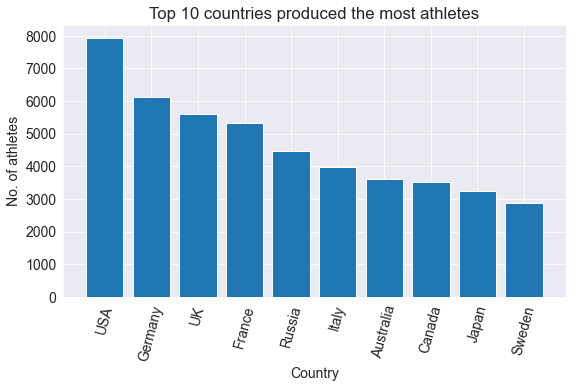

In [41]:
# count how many athletes each country have produced.
# make sure that count athletes who participated multiple times once.
athletes_each_country = merged_df_2.drop_duplicates(['Name']).groupby('region')['Name'].count().reset_index().sort_values("Name", ascending=False).head(10)

# show the bar graph
plt.bar(athletes_each_country.region, athletes_each_country.Name)
plt.xlabel('Country')
plt.ylabel('No. of athletes')
plt.xticks(rotation=75)
plt.title('Top 10 countries produced the most athletes');

It seems USA has produced the most athletes to olympics.

Let's take a look at the same number of each continent.

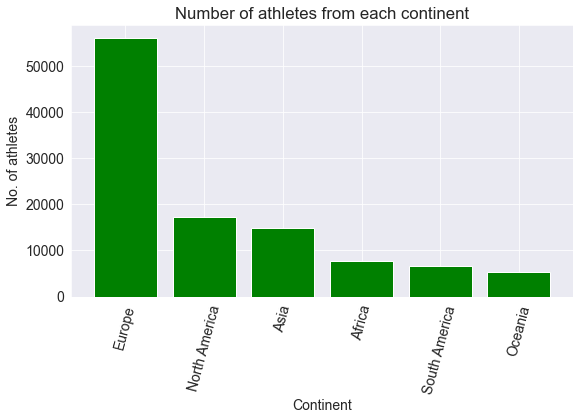

In [43]:
# the process is almost same to previous visualization.
athletes_each_continent = merged_df_2.drop_duplicates(['Name']).groupby('Continent_Name')['Name'].count().reset_index().sort_values('Name', ascending=False)

plt.bar(athletes_each_continent.Continent_Name, athletes_each_continent.Name, color='green')
plt.xlabel('Continent')
plt.ylabel('No. of athletes')
plt.xticks(rotation=75)
plt.title('Number of athletes from each continent');

Europe looks produced two times athletes more than second placed continent.

Now, let's compare the number of medals of each country.

In [44]:
# Check the type of Medals.
merged_df_2.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

We want compare the number of each medals, but current "Medal" column only represents categorical data of each medal. So, we want to create new columns which represent the number of each medal(like `Gold`, `Silver` and `Bronze`). We're going to use [`get_dummis`](https://www.geeksforgeeks.org/python-pandas-get_dummies-method/) method to get the number of each medal, and concatenate them to original dataframe using [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) function.

In [45]:
merged_df_3 = pd.concat([merged_df_2, pd.get_dummies(merged_df_2['Medal'])], axis=1)
merged_df_3

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,alpha3,Continent_Name,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Basketball,Basketball Men's Basketball,NaN,China,NaN,CHN,Asia,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,CHN,Asia,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Football,Football Men's Football,NaN,Denmark,NaN,DNK,Europe,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,DNK,Europe,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,...,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,NLD,Europe,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227604,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,...,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,RUS,Europe,0,0,0
227605,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,...,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,RUS,Asia,0,0,0
227606,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,...,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,RUS,Europe,0,0,0
227607,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,...,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,RUS,Asia,0,0,0


We can create a new dataframe which contains the total medal number and the number of each medal of each country.

In [46]:
# Firstly, create the dataframe contains the number of each medal.
each_medal_df = merged_df_3.groupby('region')[['Gold', 'Silver', 'Bronze']].sum()

# Secondly, create the dataframe contains the total number of medals.
total_medal_df = merged_df_3.dropna(subset=['Medal']).groupby('region')['Medal'].count().reset_index()

# Finally, combine these two dataframes.
number_of_medals_df = each_medal_df.merge(total_medal_df, on='region')

# sort and limit top 10 countries based on total number of medals.
top_10_countries_medals_df = number_of_medals_df.set_index('region').sort_values('Medal', ascending=False).head(10)
top_10_countries_medals_df 

,Gold,Silver,Bronze,Medal
region,,,,
USA,2472.0,1333.0,1197.0,5002
Russia,1516.0,1252.0,1325.0,4093
Germany,1075.0,987.0,1064.0,3126
UK,635.0,729.0,620.0,1984
France,463.0,567.0,587.0,1617
Italy,518.0,474.0,454.0,1446
Australia,362.0,456.0,515.0,1333
Hungary,432.0,328.0,363.0,1123
Sweden,354.0,396.0,358.0,1108


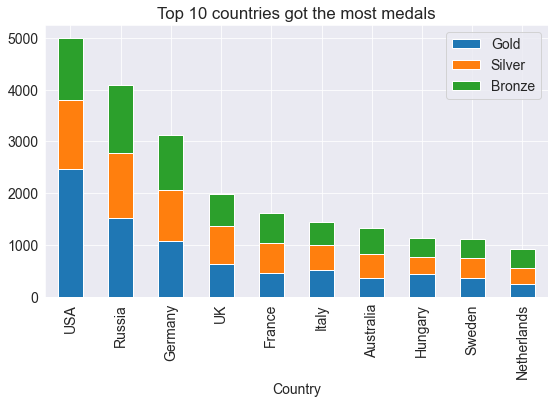

In [47]:
top_10_countries_medals_df[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, title='Top 10 countries got the most medals', xlabel='Country');

It seems USA has gotten the most medals.

Now, we're going to look at the time trends.

Let's start with the trends of the number of athletes participated in olympics.

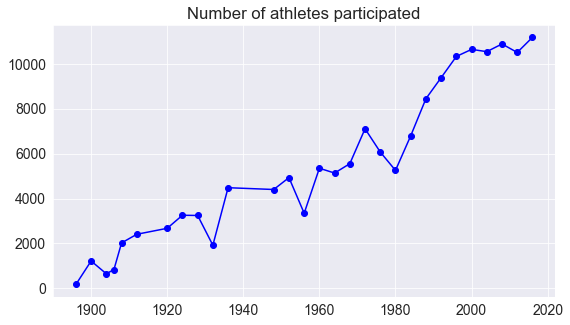

In [48]:
# create a new dataframe containing the number of all athletes by each year.
athletes_by_year = merged_df_3.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('index')
athletes_by_year = athletes_by_year.rename(columns={'index':'Year', 'Year':'total_athletes'})

# plot line chart.
plt.plot(athletes_by_year.Year, athletes_by_year.total_athletes, 'b-o')
plt.title('Number of athletes participated');

Next, look at the number of countries participated over years.

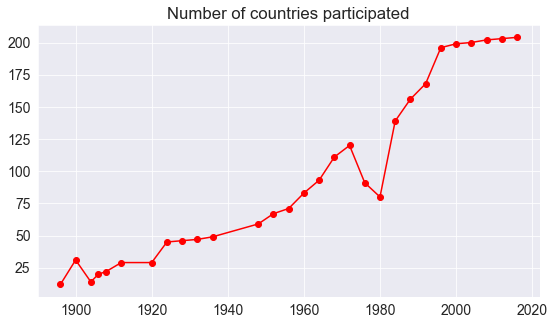

In [49]:
# create a new dataframe containing the number of countries by year.
countries_by_year = merged_df_3.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')
countries_by_year = countries_by_year.rename(columns={'index':'Year', 'Year':'total_countries'})

# plot line chart
plt.plot(countries_by_year.Year, countries_by_year.total_countries, 'r-o')
plt.title('Number of countries participated');

Let's see individual athletes.

Firstly, create the list of top 20 athletes who got the most medals.

In [50]:
top_medalists = merged_df_3.dropna(subset=['Medal']).groupby('Name')['Medal'].count().reset_index().sort_values('Medal', ascending=False).head(20)

# add nationality and sport to above dataframe.
add_df = merged_df_3.drop_duplicates('Name')[['Name', 'region', 'Sport']]
top_medalists_df = top_medalists.merge(add_df, on='Name', how='left')
top_medalists_df

,Name,Medal,region,Sport
0,"Michael Fred Phelps, II",28,USA,Swimming
1,Aleksey Yuryevich Nemov,24,Russia,Gymnastics
2,Larysa Semenivna Latynina (Diriy-),18,Russia,Gymnastics
3,Nikolay Yefimovich Andrianov,15,Russia,Gymnastics
4,Dmitry Ivanovich Sautin,15,Russia,Diving
5,Svetlana Vasilyevna Khorkina,14,Russia,Gymnastics
6,Aliya Farkhatovna Mustafina,14,Russia,Gymnastics
7,Aleksandr Vladimirovich Popov,14,Russia,Swimming
8,Takashi Ono,13,Japan,Gymnastics
9,Borys Anfiyanovych Shakhlin,13,Russia,Gymnastics


Create a bar chart represents top 20 athletes.

In [51]:
# create the dictionary about country and color for lator visualization.
colors = {'USA':'red', 'Russia':'blue', 'Japan':'yellow', 'Italy':'green', 'Germany':'orange', 'Czech Republic':'black', 'Finland':'purple'}

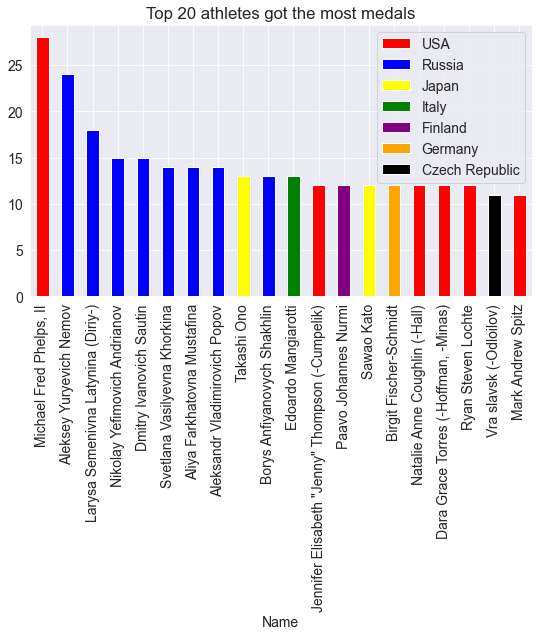

In [52]:
# import Patch to add legend lator.
from matplotlib.patches import Patch

# create bar charts.
top_medalists_df.set_index('Name').Medal.plot(kind='bar', color=top_medalists_df['region'].replace(colors)).legend(
    [
        Patch(facecolor=colors['USA']),
        Patch(facecolor=colors['Russia']),
        Patch(facecolor=colors['Japan']),
        Patch(facecolor=colors['Italy']),
        Patch(facecolor=colors['Finland']),
        Patch(facecolor=colors['Germany']),
        Patch(facecolor=colors['Czech Republic']),
    ], ['USA', 'Russia', 'Japan', 'Italy', 'Finland', 'Germany', 'Czech Republic']
)
plt.xticks(rotation='vertical')
plt.title('Top 20 athletes got the most medals');

## 4. Asking and Answering Questions

Now, we have gotten deeper perspectives about this dataset. Let's ask and answer some common questions using those insights.

### Q1:　How many countries/athletes have participated over year?

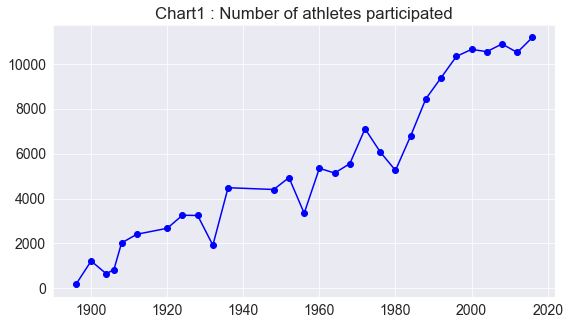

In [55]:
plt.plot(athletes_by_year.Year, athletes_by_year.total_athletes, 'b-o')
plt.title('Chart1 : Number of athletes participated');

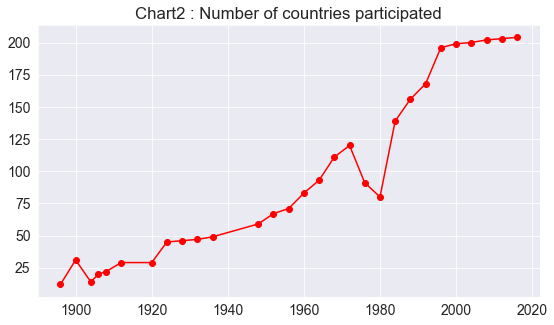

In [56]:
plt.plot(countries_by_year.Year, countries_by_year.total_countries, 'r-o')
plt.title('Chart2 : Number of countries participated');

> As we can see, both numbers have kept increasing constantly for 120 years.
> If you take a look at Chart2, you may notice a sudden decrease around 1970 to the early of 1980s. We could guess this was caused by Cold War. Some countries boycotted the participation of the Olympic because of the political problem.

### Q2:　Which country produces the most athletes to the Olympics?

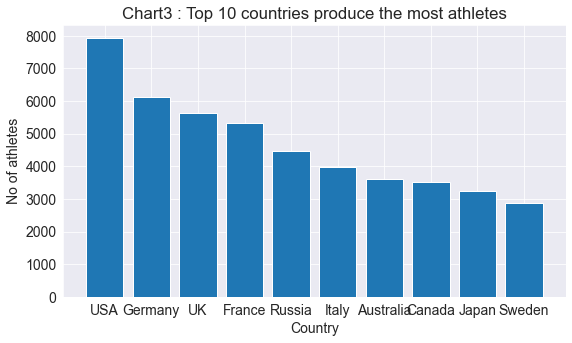

In [58]:
plt.bar(athletes_each_country.region, athletes_each_country.Name)
plt.xlabel('Country')
plt.ylabel('No of athletes')
plt.title('Chart3 : Top 10 countries produce the most athletes');

> We can see USA has produces the most athletes to olympics for 120 years, and it's almost 8000 athletes.
> However, we could say countries have huge population could produce more successful athletes. So, let's look at the percetage of athletes to total population.

In [59]:
# import the population dataset.
population_df = pd.read_csv('/Users/kazumihigashino/Data Analysis/datasets/Olympic_EDA/population-figures-by-country.csv')
population_df = population_df.rename(columns={'Country_Code' : 'alpha3'})
population_df.head(10)

,Country,alpha3,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0
5,Arab World,ARB,92490932.0,95044497.0,97682294.0,100411076.0,103239902.0,106174988.0,109230593.0,112406932.0,...,331653797.0,339825483.0,348145094.0,356508908.0,364895878.0,373306993.0,381702086.0,390043028.0,398304960.0,406452690.0
6,United Arab Emirates,ARE,92634.0,101078.0,112472.0,125566.0,138529.0,150362.0,160481.0,170283.0,...,6044067.0,6894278.0,7666393.0,8270684.0,8672475.0,8900453.0,9006263.0,9070867.0,9154302.0,9269612.0
7,Argentina,ARG,20619075.0,20953077.0,21287682.0,21621840.0,21953929.0,22283390.0,22608748.0,22932203.0,...,39970224.0,40382389.0,40799407.0,41223889.0,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0
8,Armenia,ARM,1874120.0,1941491.0,2009526.0,2077575.0,2144998.0,2211316.0,2276031.0,2339124.0,...,2933056.0,2908220.0,2888584.0,2877311.0,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0
9,American Samoa,ASM,20013.0,20486.0,21117.0,21882.0,22698.0,23520.0,24321.0,25116.0,...,57903.0,57030.0,56227.0,55637.0,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0


In [67]:
# prepare the base dataframe.
ath = merged_df_2.drop_duplicates(['Name']).groupby(['alpha3', 'region'])['Name'].count().reset_index().sort_values("Name", ascending=False)

# combine population dataframe to `ath` dataframe.
popu_and_ath = ath.merge(population_df[['alpha3', 'Year_2016']], on='alpha3', how='left')

# calculate the percent of athletes to total population and concatenate as a new columns.
popu_and_ath['percent_athletes'] = (popu_and_ath.Name / popu_and_ath.Year_2016)*100

# sort dataframe by percent athletes.
popu_and_ath_2 = popu_and_ath.sort_values('Name', ascending=False).head(10)
popu_and_ath_2 = popu_and_ath_2.sort_values('percent_athletes', ascending=False)
popu_and_ath_2

,alpha3,region,Name,Year_2016,percent_athletes
8,SWE,Sweden,2887,9903122.0,0.029152
9,NLD,Netherlands,2718,17018408.0,0.015971
5,AUS,Australia,3549,24127159.0,0.014710
6,CAN,Canada,3520,36286425.0,0.009701
1,GBR,UK,5618,65637239.0,0.008559
2,FRA,France,5329,66896109.0,0.007966
3,ITA,Italy,3973,60600590.0,0.006556
4,DEU,Germany,3753,82667685.0,0.004540
7,JPN,Japan,3253,126994511.0,0.002562
0,USA,USA,7932,323127513.0,0.002455


Now we get new dataframe containing the percentage of the number of athletes to populaiton. Let's plot the bar chart of same countries with Charts1, but ordered by percent of athletes to total population.

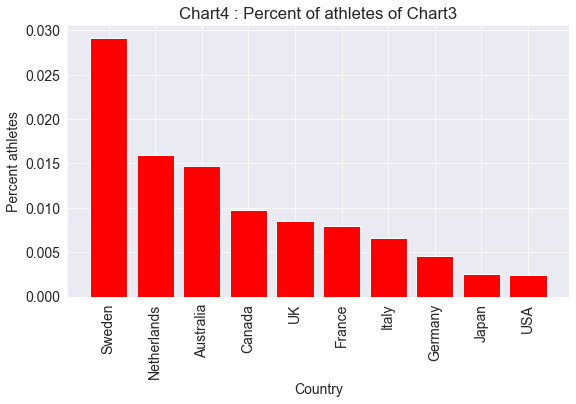

In [69]:
plt.bar(popu_and_ath_2.region, popu_and_ath_2.percent_athletes, color='red')
plt.xlabel('Country')
plt.xticks(rotation='vertical')
plt.ylabel('Percent athletes')
plt.title('Chart4 : Percent of athletes of Chart3');

> Compare Charts4 to Charts3, we can see USA is the lowest place in Charts4 even though it got the first place in Chart3. This means USA doesn't really produce many successful athletes comparing to its population. On the other hand, Sweden produces relatively many successful athletes even though it has less population.

### Q3:　Which country acquires the most medals?

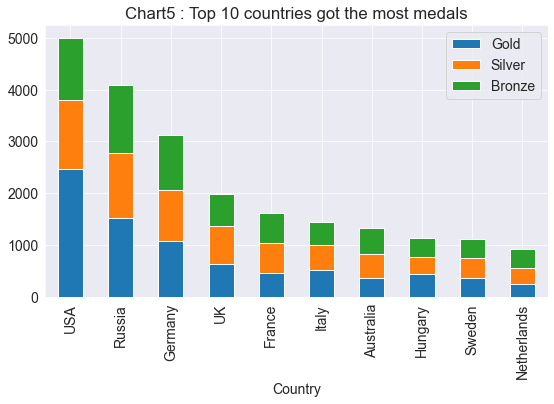

In [71]:
top_10_countries_medals_df[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, title='Chart5 : Top 10 countries got the most medals', xlabel='Country');

> It seems USA has acquired the most medals for recent 120 years.
>
>Now we want to compare Chart5 to Chart3. Let's merge two tables `top_10_countries_medals_df` and `athletes_each_country`.

In [72]:
athletes_each_country.merge(top_10_countries_medals_df, on='region')

,region,Name,Gold,Silver,Bronze,Medal
0,USA,7932,2472.0,1333.0,1197.0,5002
1,Germany,6136,1075.0,987.0,1064.0,3126
2,UK,5618,635.0,729.0,620.0,1984
3,France,5329,463.0,567.0,587.0,1617
4,Russia,4461,1516.0,1252.0,1325.0,4093
5,Italy,3973,518.0,474.0,454.0,1446
6,Australia,3599,362.0,456.0,515.0,1333
7,Sweden,2887,354.0,396.0,358.0,1108


> It seems Japan and Canada are now out from the list top 10 countries produce the most athletes. 
>
> This means Japan and Canada has produced many athletes than most countries, but they haven't been able to acquire not that many medals compare to other top 10 countries.

### Q4:　Who acquires the most medals in history? and which sport?

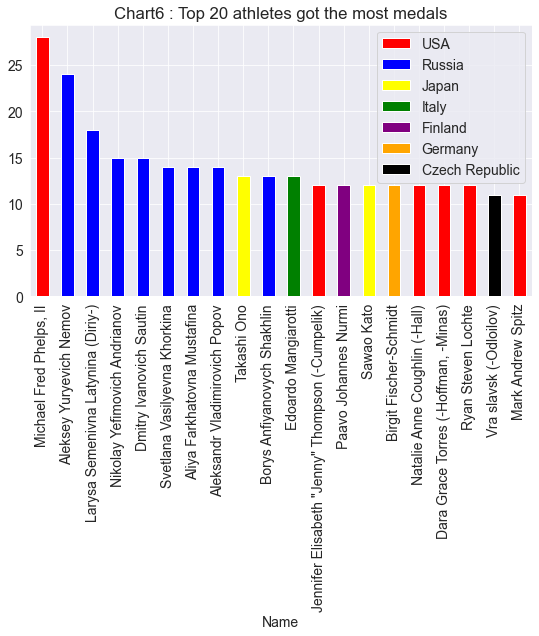

In [74]:
top_medalists_df.set_index('Name').Medal.plot(kind='bar', color=top_medalists_df['region'].replace(colors)).legend(
    [
        Patch(facecolor=colors['USA']),
        Patch(facecolor=colors['Russia']),
        Patch(facecolor=colors['Japan']),
        Patch(facecolor=colors['Italy']),
        Patch(facecolor=colors['Finland']),
        Patch(facecolor=colors['Germany']),
        Patch(facecolor=colors['Czech Republic']),
    ], ['USA', 'Russia', 'Japan', 'Italy', 'Finland', 'Germany', 'Czech Republic']
)
plt.xticks(rotation='vertical')
plt.title('Chart6 : Top 20 athletes got the most medals');

> Michael Fred Phelps, II has gotten 28 medals and been top in the ranking of the number of medals.
>
>But as the Chart6 represents, 7 athletes out of top 10 athletes are from Russia. It seems Russian athletes performed well on average.

In [75]:
top_medalists_df.head(10)

,Name,Medal,region,Sport
0,"Michael Fred Phelps, II",28,USA,Swimming
1,Aleksey Yuryevich Nemov,24,Russia,Gymnastics
2,Larysa Semenivna Latynina (Diriy-),18,Russia,Gymnastics
3,Nikolay Yefimovich Andrianov,15,Russia,Gymnastics
4,Dmitry Ivanovich Sautin,15,Russia,Diving
5,Svetlana Vasilyevna Khorkina,14,Russia,Gymnastics
6,Aliya Farkhatovna Mustafina,14,Russia,Gymnastics
7,Aleksandr Vladimirovich Popov,14,Russia,Swimming
8,Takashi Ono,13,Japan,Gymnastics
9,Borys Anfiyanovych Shakhlin,13,Russia,Gymnastics


> Also, if you look at which sport top athletes participated in, it seems most of them are from Gymnastics. Usually, one athlete participates several competitions in Gymnastics or Swimming, so maybe that's why athletes from those sports can get more medals than athletes from other sports.

In [76]:
import jovian

<IPython.core.display.Javascript object>

In [77]:
jovian.commit(filename="EDA of Olympic Games' Results for 120 years")

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/hgsnkzm/eda-of-olympic-games-results-for-120-years


'https://jovian.ai/hgsnkzm/eda-of-olympic-games-results-for-120-years'